In [1]:
import os,sys
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
import PyComplexHeatmap
from PyComplexHeatmap import *
import scipy
import seaborn
import scanpy as sc

In [ ]:
#For heatmap, a Z-score normalization is performed on the normalized read counts across samples for each gene. 
#Z-scores are computed on a gene-by-gene (row-by-row) basis by subtracting the mean and then dividing by the standard deviation. 
#The computed Z score is then used to plot heatmap. 

In [5]:
#Load scRNA data containing clusters after leiden algorithm
#adata = sc.read_h5ad("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/data/results/alldata_scrna_clustered.h5ad")

## Example

In [1]:
# import pandas as pd

# # Create a sample DataFrame
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'Dave'],
#     'Age': [25, 30, 35, 40],
#     'Salary': [50000, 60000, 70000, 80000]
# }

# df = pd.DataFrame(data)
# df.set_index('Name', inplace=True)  # Set 'Name' column as the index

# # Create a list of index values to select
# index_list = ['Bob', 'Dave']

# # Sub-select the DataFrame based on the index list
# sub_df = df.loc[index_list]

In [2]:
#print(sub_df)

      Age  Salary
Name             
Bob    30   60000
Dave   40   80000


# Continue

In [ ]:
#Cluster_id = cell_type

In [2]:
#Loading anndata to be able to create a df for the z-scores
adata = sc.read_h5ad("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/data/results/scanpy_dev_cornea_1_to_17.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 74230 × 32921
    obs: 'type', 'sample', 'time_point', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'n_genes', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'clusters', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'cell_type_colors', 'clusters_colors', 'dendrogram_cell_type', 'dendrogram_clusters', 'doublet_info_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [4]:
rank_genes = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/data/rank_genes.csv", index_col='names')
rank_genes

,group,names.1,scores,logfoldchanges,pvals,pvals_adj
names,,,,,,
MIR205HG,Limbal_stem_cell,MIR205HG,386.91898,4.168135,0.0,0.0
CXCL14,Limbal_stem_cell,CXCL14,362.27980,2.123212,0.0,0.0
KRT5,Limbal_stem_cell,KRT5,354.17688,3.187702,0.0,0.0
KRT17,Limbal_stem_cell,KRT17,330.65842,2.468866,0.0,0.0
KRT19,Limbal_stem_cell,KRT19,304.33533,3.017829,0.0,0.0
...,...,...,...,...,...,...
LDB2,Limbal_stem_cell,LDB2,-193.55673,-3.801092,0.0,0.0
CASC15,Limbal_stem_cell,CASC15,-193.61478,-3.751873,0.0,0.0
EDNRA,Limbal_stem_cell,EDNRA,-198.50490,-3.739483,0.0,0.0


In [5]:
rank_genes_greater_1 = rank_genes.loc[rank_genes['logfoldchanges']  >= 1]

In [6]:
rank_genes_greater_1

,group,names.1,scores,logfoldchanges,pvals,pvals_adj
names,,,,,,
MIR205HG,Limbal_stem_cell,MIR205HG,386.918980,4.168135,0.000000,0.000000
CXCL14,Limbal_stem_cell,CXCL14,362.279800,2.123212,0.000000,0.000000
KRT5,Limbal_stem_cell,KRT5,354.176880,3.187702,0.000000,0.000000
KRT17,Limbal_stem_cell,KRT17,330.658420,2.468866,0.000000,0.000000
KRT19,Limbal_stem_cell,KRT19,304.335330,3.017829,0.000000,0.000000
...,...,...,...,...,...,...
AL050331.2,Limbal_stem_cell,AL050331.2,0.540264,1.149870,0.589037,0.653513
AC104119.1,Limbal_stem_cell,AC104119.1,0.540264,1.149870,0.589037,0.653513
AC002401.3,Limbal_stem_cell,AC002401.3,0.516275,1.076955,0.605683,0.669679


In [7]:
rank_genes_adj = rank_genes_greater_1.loc[rank_genes_greater_1['pvals_adj']  <= 0.05 ]

In [8]:
rank_genes_adj

,group,names.1,scores,logfoldchanges,pvals,pvals_adj
names,,,,,,
MIR205HG,Limbal_stem_cell,MIR205HG,386.918980,4.168135,0.000000,0.000000
CXCL14,Limbal_stem_cell,CXCL14,362.279800,2.123212,0.000000,0.000000
KRT5,Limbal_stem_cell,KRT5,354.176880,3.187702,0.000000,0.000000
KRT17,Limbal_stem_cell,KRT17,330.658420,2.468866,0.000000,0.000000
KRT19,Limbal_stem_cell,KRT19,304.335330,3.017829,0.000000,0.000000
...,...,...,...,...,...,...
AC010974.1,Limbal_stem_cell,AC010974.1,2.145083,1.847196,0.031991,0.048654
AC093752.2,Limbal_stem_cell,AC093752.2,2.138632,1.251509,0.032509,0.049404
AL355916.2,Limbal_stem_cell,AL355916.2,2.136347,1.414941,0.032695,0.049680


In [9]:
rank_genes_list = rank_genes_adj.index.values.tolist()

In [10]:
rank_genes_list

['MIR205HG',
 'CXCL14',
 'KRT5',
 'KRT17',
 'KRT19',
 'COL17A1',
 'PAX6',
 'BCAM',
 'MEIS2',
 'IGFBP7',
 'PERP',
 'DST',
 'UPK3BL1',
 'C19orf33',
 'GJB2',
 'CTSV',
 'WNT6',
 'DACH2',
 'SOX6',
 'IGFBP6',
 'FRAS1',
 'S100A2',
 'DSP',
 'SYT1',
 'SPINT2',
 'LGALS7B',
 'ERBB4',
 'DCDC1',
 'DAPL1',
 'PDLIM1',
 'KRT15',
 'MGARP',
 'TRIM29',
 'LAMA3',
 'ABI3BP',
 'PLP2',
 'KAZN',
 'TRPM3',
 'DSC3',
 'RETREG1',
 'KRT12',
 'MEIS1',
 'PTN',
 'GJB6',
 'WNT4',
 'H19',
 'TACSTD2',
 'FXYD3',
 'NRG3',
 'CRLF1',
 'WNT10A',
 'TKT',
 'COL7A1',
 'TP63',
 'P3H2',
 'FRMD4B',
 'CYP2W1',
 'CKB',
 'DSC2',
 'AL391650.1',
 'SFN',
 'CD9',
 'AL137804.1',
 'SYNE2',
 'KLF5',
 'SLC2A1',
 'KIAA1217',
 'PAWR',
 'BNC2',
 'LAMB3',
 'CAV1',
 'CDH3',
 'GPC3',
 'DPP10',
 'STON2',
 'COL18A1',
 'WNT3',
 'IER3',
 'EGFR',
 'KRT8',
 'FHOD3',
 'DSCAML1',
 'SHISA9',
 'LAMB4',
 'GRIA4',
 'SLC25A48',
 'LGALS3',
 'S100A16',
 'DDR1',
 'GRHL2',
 'ADIRF',
 'VIT',
 'NTNG1',
 'NKAIN2',
 'GAS1',
 'CPAMD8',
 'WWOX',
 'TRIM36',
 'KANK1',
 'T

## Preparing the dataframe with z-scores

In [17]:
# Join the strings from the two columns and create a new column
#adata.obs['timepoint_celltype'] = adata.obs['time_point'].astype(str) + '_' + adata.obs['cell_type'].astype(str)
#adata.obs

In [11]:
#TRIAL BY SWOPPING PREVIOUS LABELING
adata.obs['timepoint_celltype'] = adata.obs['cell_type'].astype(str) + '_' + adata.obs['time_point'].astype(str)
adata.obs

,type,sample,time_point,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,XIST-counts,S_score,G2M_score,phase,doublet_scores,predicted_doublets,doublet_info,clusters,cell_type,timepoint_celltype
AAACGAACATTGAAGA-1-0,dev_cornea,dc1,10PCW,0,2730,8938.0,349.0,3.904677,2712.0,30.342358,...,3.0,-0.621783,-0.741423,G1,0.108108,False,False,18,Fibroblast,Fibroblast_10PCW
AAAGTCCAGAAAGTCT-1-0,dev_cornea,dc1,10PCW,0,3398,11587.0,387.0,3.339950,3320.0,28.652800,...,1.0,-0.787741,-1.115565,G1,0.076923,False,False,18,Fibroblast,Fibroblast_10PCW
AAAGTGAAGCGCACAA-1-0,dev_cornea,dc1,10PCW,0,2341,7676.0,407.0,5.302241,2203.0,28.699844,...,2.0,-0.622999,-0.643734,G1,0.085937,False,False,18,Fibroblast,Fibroblast_10PCW
AAAGTGACAGTTGCGC-1-0,dev_cornea,dc1,10PCW,0,1542,3338.0,193.0,5.781905,733.0,21.959257,...,2.0,-0.236170,-0.247923,G1,0.055556,False,False,3,Fibroblast,Fibroblast_10PCW
AACAAGAAGCGAATGC-1-0,dev_cornea,dc1,10PCW,0,1998,5283.0,88.0,1.665720,1654.0,31.307968,...,2.0,-0.578014,-0.423619,G1,0.085937,False,False,3,Fibroblast,Fibroblast_10PCW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACACTTAG-1-16,dev_cornea,dc17,21PCW,16,2719,6286.0,639.0,10.165447,600.0,9.545021,...,0.0,-0.851976,-0.414139,G1,0.033866,False,False,3,Fibroblast,Fibroblast_21PCW
TTTGTTGGTAAGGTCG-1-16,dev_cornea,dc17,21PCW,16,5082,17376.0,1974.0,11.360497,3156.0,18.162983,...,0.0,-0.649645,-1.046407,G1,0.018707,False,False,4,Limbal_stem_cell,Limbal_stem_cell_21PCW
TTTGTTGGTATCGCAT-1-16,dev_cornea,dc17,21PCW,16,4268,11912.0,726.0,6.094695,2085.0,17.503359,...,0.0,-0.304559,-0.789906,G1,0.083252,False,False,12,Vessels,Vessels_21PCW
TTTGTTGTCCGTGGCA-1-16,dev_cornea,dc17,21PCW,16,3070,7777.0,806.0,10.363894,1206.0,15.507264,...,0.0,-0.399595,-0.631997,G1,0.018008,False,False,4,Limbal_stem_cell,Limbal_stem_cell_21PCW


In [ ]:
marker_genes_dict = {
    'Limbal/Epithelial': ['KRT3','KRT14', 'KRT12', 'KRT15', 'S100A8','AREG', 'CXCL17'],
    'Limbal': ['CXCL14','PAX6', 'S100A2', 'TP63'],
    'Cj': ['S100A2', 'KRT24', 'KRT13'],
    'CE': ['KRT24'],
    'Corneal_stem_kero': ['THY1', 'NT5E'],
    'TSK': ['MMP1', 'MMP2', 'MMP3'],
    'CF': ['KRT12', 'MMP2', 'FBLN1', 'COL1A1', 'COL5A1', 'FBLN1', 'NAV1'],
    'Mural': ['ACTA2', 'NOTCH3', 'MYL9', 'STOM', 'MCAM', 'CNN1', 'PKIG', 'DES', 'LMOD1'], 
    'EC': ['COL8A2','CA3', 'CLRN1', 'MRGPRX3', 'HTR1D', 'GRIP1', 'ZP4', 'ALCAM', 'SLC4A11'],
    'Ves': ['CD34', 'ACKR1', 'LYVE1', 'PECAM1'],
    'Mel': ['DCT','MITF', 'PMEL', 'TYRP1', 'MLANA', 'AC109466.1'],
    'IC': ['CCL3', 'CCL4', 'CCL20', 'CXCL2', 'CXCL8', 'PTPRC'],
    'nm-cSC': ['SOX10', 'CDH19', 'NGFR', 'SCN7A'],
    'new_markers': ['PCNA', 'TOP2A', 'MCM6', 'MKI67', 'LRIG1', 'NOTCH1', 'MEIS1'],
    'lens': ['CRYGS', 'HES1'],
    'developmental_markers': ['TFRC', 'ABCG2', 'LGR5', 'BST1', 'NT5E', 'ENG', 'TGFB1', 'TGFB2', 'FGF8'],
    'general_markers': ['KERA', 'LUM', 'DCN'],
}

In [ ]:
ax = sc.pl.stacked_violin(adata, marker_genes_dict, groupby='timepoint_celltype', swap_axes=False, dendrogram=False, save= 'timepoint_celltype_stackedviolin.pdf')

In [12]:
#Import these all before: 
from statistics import mean
from sklearn.preprocessing import StandardScaler

In [13]:
adata.obs['timepoint_celltype'].astype("category")

AAACGAACATTGAAGA-1-0           Fibroblast_10PCW
AAAGTCCAGAAAGTCT-1-0           Fibroblast_10PCW
AAAGTGAAGCGCACAA-1-0           Fibroblast_10PCW
AAAGTGACAGTTGCGC-1-0           Fibroblast_10PCW
AACAAGAAGCGAATGC-1-0           Fibroblast_10PCW
                                  ...          
TTTGTTGCACACTTAG-1-16          Fibroblast_21PCW
TTTGTTGGTAAGGTCG-1-16    Limbal_stem_cell_21PCW
TTTGTTGGTATCGCAT-1-16             Vessels_21PCW
TTTGTTGTCCGTGGCA-1-16    Limbal_stem_cell_21PCW
TTTGTTGTCGTTTACT-1-16          Fibroblast_21PCW
Name: timepoint_celltype, Length: 74230, dtype: category
Categories (98, object): ['Conjunctiva_10PCW', 'Conjunctiva_12PCW', 'Conjunctiva_13PCW', 'Conjunctiva_14PCW', ..., 'Vessels_17PCW', 'Vessels_18PCW', 'Vessels_20PCW', 'Vessels_21PCW']

In [ ]:
#cluster_id = column of timepoint and cell_type joined together

In [14]:
print(str("Seurat NormalizeData with default settings will be run on all the genes"))
sc.pp.normalize_total(adata, inplace = True)
cluster_id = 'timepoint_celltype'
## Generate the df with mean normalized expression
exp_mat = pd.DataFrame(columns = adata.var_names.tolist(), index = adata.obs[cluster_id].astype("category").unique())                                                                                          
for clust in adata.obs[cluster_id].astype("category").unique(): 
    exp_mat.loc[clust] = adata[adata.obs[cluster_id].isin([clust]),:].X.mean(0)

## Ensure that all genes in matrix have mean expression > 0
exp_mat.loc["sum"] = np.sum(exp_mat,axis = 0).tolist()
exp_mat_transposed = exp_mat.transpose()
exp_mat_transposed = exp_mat_transposed.loc[exp_mat_transposed['sum'] > 0] #Checking what it looks like with both 0.05 and 0 as the cutoff

Seurat NormalizeData with default settings will be run on all the genes


In [15]:
exp_mat_transposed.drop(['sum'], axis=1, inplace=True) #forgot to do it in place, did it later

In [16]:
#Try to split timepoint_celltypes here instead of later -----no 'Immune_10PCW',
variable_cellstates = ['Immune_12PCW','Immune_13PCW','Immune_14PCW','Immune_16PCW','Immune_17PCW','Immune_18PCW','Immune_20PCW','Immune_21PCW','Endothelium_10PCW','Endothelium_12PCW','Endothelium_13PCW','Endothelium_14PCW','Endothelium_16PCW','Endothelium_17PCW','Endothelium_18PCW','Endothelium_20PCW','Endothelium_21PCW','Schwann_10PCW','Schwann_12PCW','Schwann_13PCW','Schwann_14PCW','Schwann_16PCW','Schwann_17PCW','Schwann_18PCW','Schwann_20PCW','Schwann_21PCW']

In [17]:
dataframe_1 = exp_mat_transposed[variable_cellstates]
dataframe_1 #no immune_10pcw

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
AL627309.1,0.008158,0.0,0.007356,0.004247,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000485,0.0,0.002634,0.0,0.0,0.0,0.003549,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.5,0.005819,0.048056,0.021496,0.007421,0.0,0.0,0.0,0.0,0.0,0.001976,...,0.0,0.0,0.004992,0.0,0.003678,0.008775,0.0,0.0,0.000952,0.000916
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC114498.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054359,0.00646,...,0.0,0.0,0.011179,0.002932,0.004211,0.0,0.0,0.0,0.0,0.001729
AC136352.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC023491.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003041,0.0,0.004066,0.0,0.0,0.0,0.0,0.000877
AC007325.4,0.019304,0.0,0.036394,0.0,0.0,0.0,0.012876,0.020579,0.0,0.05386,...,0.0,0.0,0.030642,0.05618,0.033906,0.024024,0.0,0.03238,0.019221,0.016407


In [18]:
dataframe_2_list = exp_mat_transposed.columns.difference(variable_cellstates)
dataframe_2 = exp_mat_transposed[dataframe_2_list]
dataframe_2

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Stroma_21PCW,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW
AL627309.1,0.0,0.000824,0.00616,0.000492,0.0,0.0,0.001434,0.002376,0.001825,0.0,...,0.001179,0.049372,0.0,0.0,0.004572,0.003159,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.5,0.005948,0.002911,0.011594,0.008665,0.008517,0.0,0.006305,0.003943,0.003328,0.0,...,0.002004,0.0,0.0,0.003737,0.00902,0.004031,0.0,0.0,0.005502,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC114498.1,0.0,0.0,0.0,0.0,0.0,0.0,0.001308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,0.008374,0.014583,0.004341,0.001145,0.000888,0.015909,0.002232,0.001437,0.000187,0.0,...,0.000913,0.0,0.0,0.0,0.003475,0.001408,0.0,0.0,0.001444,0.0
AC136352.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC023491.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.046587,0.131498,0.125439,0.099,0.077766,0.023369,0.069579,0.053051,0.056856,0.041447,...,0.02446,0.0,0.015651,0.002424,0.008606,0.020346,0.025925,0.015888,0.007406,0.018899


In [19]:
## Select the same exp_mat columns as in mot_mat columns (if the grouping var is the same)
#exp_mat_transposed = exp_mat_transposed[mot_mat.index.tolist()]  #REMOVED DUE TO NO MOT_MAT
exp_mat_1 = dataframe_1.transpose() 
## limit table to motifs and TFs present in dataset
TF_mat_1 = exp_mat_1

In [20]:
exp_mat_2 = dataframe_2.transpose() 
## limit table to motifs and TFs present in dataset
TF_mat_2 = exp_mat_2

In [21]:
TF_mat_1

,AL627309.1,AL627309.3,AL627309.5,AP006222.2,AC114498.1,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,...,AC011841.1,BX072566.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC136352.3,AC023491.2,AC007325.4,AC007325.2
Immune_12PCW,0.008158,0.0,0.005819,0.0,0.0,0.0,0.044171,0.0,0.08529,0.0,...,0.0,0.0,0.0,0.052931,0.01855,0.0,0.0,0.0,0.019304,0.0
Immune_13PCW,0.0,0.0,0.048056,0.0,0.0,0.0,0.041524,0.0,0.173285,0.011039,...,0.0,0.0,0.0,0.073234,0.008243,0.0,0.0,0.0,0.0,0.0
Immune_14PCW,0.007356,0.0,0.021496,0.0,0.0,0.0,0.04727,0.0,0.108831,0.016265,...,0.0,0.0,0.0,0.086925,0.0,0.0,0.0,0.0,0.036394,0.0
Immune_16PCW,0.004247,0.0,0.007421,0.0,0.0,0.0,0.059036,0.0,0.143447,0.040892,...,0.0,0.0,0.0,0.082897,0.005067,0.0,0.0,0.0,0.0,0.0
Immune_17PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.072463,0.0,0.111059,0.0,...,0.0,0.0,0.0,0.102632,0.036875,0.0,0.0,0.0,0.0,0.0
Immune_18PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202046,0.061952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Immune_20PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.039326,0.0,0.065005,0.015078,...,0.0,0.0,0.0,0.08643,0.036461,0.0,0.0,0.0,0.012876,0.0
Immune_21PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.026113,0.0,0.049903,0.020109,...,0.0,0.0,0.0,0.10016,0.0,0.0,0.0,0.0,0.020579,0.005193
Endothelium_10PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.054359,0.0,0.054359,0.0,0.0,0.0,0.0
Endothelium_12PCW,0.0,0.0,0.001976,0.0,0.0,0.0,0.040621,0.0,0.05289,0.00943,...,0.0,0.0,0.0,0.104752,0.04651,0.00646,0.0,0.0,0.05386,0.0


In [22]:
TF_mat_2

,AL627309.1,AL627309.3,AL627309.5,AP006222.2,AC114498.1,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,...,AC011841.1,BX072566.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC136352.3,AC023491.2,AC007325.4,AC007325.2
Conjunctiva_10PCW,0.0,0.0,0.005948,0.0,0.0,0.036279,0.005611,0.0,0.105805,0.0,...,0.0,0.0,0.0,0.074626,0.005197,0.008374,0.0,0.0,0.046587,0.0
Conjunctiva_12PCW,0.000824,0.0,0.002911,0.0,0.0,0.0,0.040781,0.000899,0.06138,0.007029,...,0.0,0.000671,0.0,0.091813,0.015163,0.014583,0.0,0.0,0.131498,0.008843
Conjunctiva_13PCW,0.00616,0.0,0.011594,0.0,0.0,0.0,0.007782,0.0,0.06809,0.005532,...,0.0,0.0,0.003015,0.10986,0.00621,0.004341,0.0,0.0,0.125439,0.016914
Conjunctiva_14PCW,0.000492,0.0,0.008665,0.0,0.0,0.0,0.031498,0.0,0.067302,0.008186,...,0.0,0.0,0.0,0.041725,0.01316,0.001145,0.0,0.0,0.099,0.061661
Conjunctiva_16PCW,0.0,0.0,0.008517,0.0,0.0,0.0,0.019618,0.0,0.042312,0.00873,...,0.0,0.0,0.0,0.114417,0.011245,0.000888,0.0,0.0,0.077766,0.075816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vessels_16PCW,0.003159,0.0,0.004031,0.0,0.0,0.0,0.01144,0.0,0.127019,0.016427,...,0.0,0.0,0.0,0.207254,0.010562,0.001408,0.0,0.0,0.020346,0.0
Vessels_17PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.068076,0.0,0.110597,0.0,...,0.0,0.0,0.0,0.253274,0.019356,0.0,0.0,0.0,0.025925,0.0
Vessels_18PCW,0.0,0.0,0.0,0.0,0.0,0.0,0.015171,0.0,0.101169,0.007944,...,0.0,0.0,0.0,0.143832,0.032999,0.0,0.0,0.0,0.015888,0.002056
Vessels_20PCW,0.0,0.0,0.005502,0.0,0.0,0.0,0.034638,0.0,0.134391,0.009284,...,0.0,0.0,0.000529,0.183632,0.021464,0.001444,0.0,0.0,0.007406,0.001467


In [23]:
# Import the scaler function from sklearn and scale
exp_plot_scale_1 = TF_mat_1

scs = StandardScaler()
scs.fit(exp_plot_scale_1)
scs.scale_ = np.std(exp_plot_scale_1, axis = 0, ddof = 1).to_list()
exp_plot_scale_1 = scs.transform(exp_plot_scale_1) #This is the line that gets rid of the column names and rows
exp_plot_scale_1 = pd.DataFrame(exp_plot_scale_1)
exp_plot_scale_1.columns = TF_mat_1.columns  #We dont have exp_plot, just exp_plot_scale
exp_plot_scale_1.index = TF_mat_1.index

/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:1013: RuntimeWarning: invalid value encountered in divide
  X /= self.scale_


In [24]:
# Import the scaler function from sklearn and scale
exp_plot_scale_2 = TF_mat_2

scs = StandardScaler()
scs.fit(exp_plot_scale_2)
scs.scale_ = np.std(exp_plot_scale_2, axis = 0, ddof = 1).to_list()
exp_plot_scale_2 = scs.transform(exp_plot_scale_2) #This is the line that gets rid of the column names and rows
exp_plot_scale_2 = pd.DataFrame(exp_plot_scale_2)
exp_plot_scale_2.columns = TF_mat_2.columns  #We dont have exp_plot, just exp_plot_scale
exp_plot_scale_2.index = TF_mat_2.index

/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:1013: RuntimeWarning: invalid value encountered in divide
  X /= self.scale_


In [25]:
#try to see how the exp_plot_scale looks like in the end
exp_plot_scale_1 = exp_plot_scale_1.transpose()
exp_plot_scale_1

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
AL627309.1,2.164606,-0.536354,1.899088,0.869610,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,...,-0.536354,-0.536354,-0.375865,-0.536354,0.335654,-0.536354,-0.536354,-0.536354,0.638462,-0.536354
AL627309.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL627309.5,0.157445,4.338804,1.709416,0.316084,-0.418593,-0.418593,-0.418593,-0.418593,-0.418593,-0.222926,...,-0.418593,-0.418593,0.075645,-0.418593,-0.054511,0.450069,-0.418593,-0.418593,-0.324375,-0.327919
AP006222.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC114498.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,4.759562,0.307950,...,-0.292395,-0.292395,0.746568,-0.019868,0.098978,-0.292395,-0.292395,-0.292395,-0.292395,-0.131698
AC136352.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC023491.2,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,...,-0.312783,-0.312783,2.784748,-0.312783,3.828552,-0.312783,-0.312783,-0.312783,-0.312783,0.580698
AC007325.4,0.128666,-0.966093,1.097870,-0.966093,-0.966093,-0.966093,-0.235881,0.200939,-0.966093,2.088383,...,-0.966093,-0.966093,0.771669,2.219914,0.956765,0.396339,-0.966093,0.870238,0.123946,-0.035647


In [26]:
exp_plot_scale_2 = exp_plot_scale_2.transpose()
exp_plot_scale_2

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Stroma_21PCW,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW
AL627309.1,-0.273155,-0.133756,0.769577,-0.189820,-0.273155,-0.273155,-0.030375,0.129079,0.035815,-0.273155,...,-0.073517,8.084316,-0.273155,-0.273155,0.500823,0.261606,-0.273155,-0.273155,-0.273155,-0.273155
AL627309.3,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,...,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762
AL627309.5,0.944432,-0.007571,2.714013,1.795813,1.749710,-0.920194,1.056043,0.315888,0.122927,-0.920194,...,-0.292046,-0.920194,-0.920194,0.251237,1.907228,0.343396,-0.920194,-0.920194,0.804322,-0.920194
AP006222.2,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,...,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867
AC114498.1,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,7.679592,-0.163604,-0.163604,-0.163604,...,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,0.683323,1.514429,0.143481,-0.284299,-0.318720,1.692053,-0.138727,-0.245199,-0.412564,-0.437551,...,-0.315351,-0.437551,-0.437551,-0.437551,0.027573,-0.249063,-0.437551,-0.437551,-0.244271,-0.437551
AC136352.3,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,7.763836,-0.167033,-0.167033,...,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033
AC023491.2,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,...,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329
AC007325.4,0.522297,3.819544,3.584246,2.557568,1.733034,-0.379277,1.415117,0.773313,0.921061,0.322697,...,-0.336911,-1.286750,-0.678999,-1.192605,-0.952556,-0.496672,-0.280032,-0.669808,-0.999150,-0.552889


In [27]:
#exp_plot_scale_1.drop(['sum'], axis=1, inplace=True)

In [38]:
#exp_plot_scale_2.drop(['sum'], axis=1, inplace=True)

In [29]:
exp_plot_scale_1_test = exp_plot_scale_1.dropna()
exp_plot_scale_1_test

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
AL627309.1,2.164606,-0.536354,1.899088,0.869610,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,...,-0.536354,-0.536354,-0.375865,-0.536354,0.335654,-0.536354,-0.536354,-0.536354,0.638462,-0.536354
AL627309.5,0.157445,4.338804,1.709416,0.316084,-0.418593,-0.418593,-0.418593,-0.418593,-0.418593,-0.222926,...,-0.418593,-0.418593,0.075645,-0.418593,-0.054511,0.450069,-0.418593,-0.418593,-0.324375,-0.327919
LINC01409,-0.078966,-0.149653,0.003769,0.317933,0.676420,-1.258329,-0.208323,-0.561129,-1.258329,-0.173767,...,-1.258329,-0.005050,-0.233216,0.517307,0.303501,-0.239225,3.744042,0.117207,-0.006989,0.345265
FAM87B,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
LINC01128,0.303897,2.027623,0.765037,1.443129,0.808694,2.591015,-0.093452,-0.389284,-1.366828,-0.330778,...,-0.033170,0.554229,-0.333832,-0.184660,-0.374626,-0.476854,0.507440,1.018742,-0.495288,-0.229690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC240274.1,-0.228717,-0.564187,-0.832455,-0.667532,0.367664,-0.832455,0.354182,-0.832455,-0.832455,0.681245,...,3.783163,0.108989,0.033416,0.033700,0.190513,0.150245,-0.832455,-0.832455,0.100494,0.318255
AC004556.3,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,4.759562,0.307950,...,-0.292395,-0.292395,0.746568,-0.019868,0.098978,-0.292395,-0.292395,-0.292395,-0.292395,-0.131698
AC023491.2,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,...,-0.312783,-0.312783,2.784748,-0.312783,3.828552,-0.312783,-0.312783,-0.312783,-0.312783,0.580698
AC007325.4,0.128666,-0.966093,1.097870,-0.966093,-0.966093,-0.966093,-0.235881,0.200939,-0.966093,2.088383,...,-0.966093,-0.966093,0.771669,2.219914,0.956765,0.396339,-0.966093,0.870238,0.123946,-0.035647


In [30]:
exp_plot_scale_1 = exp_plot_scale_1_test

# Continue...end

# Visualizing Differential Expression Genes

In [31]:
rank_genes_list #Check the length (highly variable genes should be less than total number of genes)

['MIR205HG',
 'CXCL14',
 'KRT5',
 'KRT17',
 'KRT19',
 'COL17A1',
 'PAX6',
 'BCAM',
 'MEIS2',
 'IGFBP7',
 'PERP',
 'DST',
 'UPK3BL1',
 'C19orf33',
 'GJB2',
 'CTSV',
 'WNT6',
 'DACH2',
 'SOX6',
 'IGFBP6',
 'FRAS1',
 'S100A2',
 'DSP',
 'SYT1',
 'SPINT2',
 'LGALS7B',
 'ERBB4',
 'DCDC1',
 'DAPL1',
 'PDLIM1',
 'KRT15',
 'MGARP',
 'TRIM29',
 'LAMA3',
 'ABI3BP',
 'PLP2',
 'KAZN',
 'TRPM3',
 'DSC3',
 'RETREG1',
 'KRT12',
 'MEIS1',
 'PTN',
 'GJB6',
 'WNT4',
 'H19',
 'TACSTD2',
 'FXYD3',
 'NRG3',
 'CRLF1',
 'WNT10A',
 'TKT',
 'COL7A1',
 'TP63',
 'P3H2',
 'FRMD4B',
 'CYP2W1',
 'CKB',
 'DSC2',
 'AL391650.1',
 'SFN',
 'CD9',
 'AL137804.1',
 'SYNE2',
 'KLF5',
 'SLC2A1',
 'KIAA1217',
 'PAWR',
 'BNC2',
 'LAMB3',
 'CAV1',
 'CDH3',
 'GPC3',
 'DPP10',
 'STON2',
 'COL18A1',
 'WNT3',
 'IER3',
 'EGFR',
 'KRT8',
 'FHOD3',
 'DSCAML1',
 'SHISA9',
 'LAMB4',
 'GRIA4',
 'SLC25A48',
 'LGALS3',
 'S100A16',
 'DDR1',
 'GRHL2',
 'ADIRF',
 'VIT',
 'NTNG1',
 'NKAIN2',
 'GAS1',
 'CPAMD8',
 'WWOX',
 'TRIM36',
 'KANK1',
 'T

In [32]:
expr_1 = exp_plot_scale_1

In [33]:
expr_2 = exp_plot_scale_2

In [34]:
#Making a column to add all the gene names into that isnt the index
expr_1['genes'] = expr_1.index.values
expr_1

/tmp/ipykernel_2961407/104075202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expr_1['genes'] = expr_1.index.values


,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW,genes
AL627309.1,2.164606,-0.536354,1.899088,0.869610,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,-0.536354,...,-0.536354,-0.375865,-0.536354,0.335654,-0.536354,-0.536354,-0.536354,0.638462,-0.536354,AL627309.1
AL627309.5,0.157445,4.338804,1.709416,0.316084,-0.418593,-0.418593,-0.418593,-0.418593,-0.418593,-0.222926,...,-0.418593,0.075645,-0.418593,-0.054511,0.450069,-0.418593,-0.418593,-0.324375,-0.327919,AL627309.5
LINC01409,-0.078966,-0.149653,0.003769,0.317933,0.676420,-1.258329,-0.208323,-0.561129,-1.258329,-0.173767,...,-0.005050,-0.233216,0.517307,0.303501,-0.239225,3.744042,0.117207,-0.006989,0.345265,LINC01409
FAM87B,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,FAM87B
LINC01128,0.303897,2.027623,0.765037,1.443129,0.808694,2.591015,-0.093452,-0.389284,-1.366828,-0.330778,...,0.554229,-0.333832,-0.184660,-0.374626,-0.476854,0.507440,1.018742,-0.495288,-0.229690,LINC01128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC240274.1,-0.228717,-0.564187,-0.832455,-0.667532,0.367664,-0.832455,0.354182,-0.832455,-0.832455,0.681245,...,0.108989,0.033416,0.033700,0.190513,0.150245,-0.832455,-0.832455,0.100494,0.318255,AC240274.1
AC004556.3,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,-0.292395,4.759562,0.307950,...,-0.292395,0.746568,-0.019868,0.098978,-0.292395,-0.292395,-0.292395,-0.292395,-0.131698,AC004556.3
AC023491.2,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,-0.312783,...,-0.312783,2.784748,-0.312783,3.828552,-0.312783,-0.312783,-0.312783,-0.312783,0.580698,AC023491.2
AC007325.4,0.128666,-0.966093,1.097870,-0.966093,-0.966093,-0.966093,-0.235881,0.200939,-0.966093,2.088383,...,-0.966093,0.771669,2.219914,0.956765,0.396339,-0.966093,0.870238,0.123946,-0.035647,AC007325.4


In [35]:
#Making a column to add all the gene names into that isnt the index
expr_2['genes'] = expr_2.index.values
expr_2

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW,genes
AL627309.1,-0.273155,-0.133756,0.769577,-0.189820,-0.273155,-0.273155,-0.030375,0.129079,0.035815,-0.273155,...,8.084316,-0.273155,-0.273155,0.500823,0.261606,-0.273155,-0.273155,-0.273155,-0.273155,AL627309.1
AL627309.3,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,...,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,-0.151762,AL627309.3
AL627309.5,0.944432,-0.007571,2.714013,1.795813,1.749710,-0.920194,1.056043,0.315888,0.122927,-0.920194,...,-0.920194,-0.920194,0.251237,1.907228,0.343396,-0.920194,-0.920194,0.804322,-0.920194,AL627309.5
AP006222.2,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,...,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,-0.183867,AP006222.2
AC114498.1,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,7.679592,-0.163604,-0.163604,-0.163604,...,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,-0.163604,AC114498.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,0.683323,1.514429,0.143481,-0.284299,-0.318720,1.692053,-0.138727,-0.245199,-0.412564,-0.437551,...,-0.437551,-0.437551,-0.437551,0.027573,-0.249063,-0.437551,-0.437551,-0.244271,-0.437551,AC004556.3
AC136352.3,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,7.763836,-0.167033,-0.167033,...,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,-0.167033,AC136352.3
AC023491.2,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,...,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,-0.189329,AC023491.2
AC007325.4,0.522297,3.819544,3.584246,2.557568,1.733034,-0.379277,1.415117,0.773313,0.921061,0.322697,...,-1.286750,-0.678999,-1.192605,-0.952556,-0.496672,-0.280032,-0.669808,-0.999150,-0.552889,AC007325.4


In [34]:
#final_list = [gene.strip('\n') for genes in rank_genes_list for gene in genes]

In [36]:
#final_list

In [36]:
expr_1.set_index('genes', inplace=True) #Only run once as it sets that column as the index

In [37]:
expr_2.set_index('genes', inplace=True)

In [38]:
#KeyError: "['AC244472.1'] not in index" error was found in next cell
filtered_index_list_1 = [val for val in rank_genes_list if val in expr_1.index] #added

In [39]:
filtered_index_list_2 = [val for val in rank_genes_list if val in expr_2.index]

In [40]:
final_list_1 = filtered_index_list_1
final_list_1

['MIR205HG',
 'CXCL14',
 'KRT5',
 'KRT17',
 'KRT19',
 'COL17A1',
 'PAX6',
 'BCAM',
 'MEIS2',
 'IGFBP7',
 'PERP',
 'DST',
 'UPK3BL1',
 'C19orf33',
 'GJB2',
 'CTSV',
 'WNT6',
 'DACH2',
 'SOX6',
 'IGFBP6',
 'FRAS1',
 'S100A2',
 'DSP',
 'SYT1',
 'SPINT2',
 'LGALS7B',
 'ERBB4',
 'DCDC1',
 'DAPL1',
 'PDLIM1',
 'KRT15',
 'MGARP',
 'TRIM29',
 'LAMA3',
 'ABI3BP',
 'PLP2',
 'KAZN',
 'TRPM3',
 'DSC3',
 'RETREG1',
 'KRT12',
 'MEIS1',
 'PTN',
 'GJB6',
 'WNT4',
 'H19',
 'TACSTD2',
 'FXYD3',
 'NRG3',
 'CRLF1',
 'WNT10A',
 'TKT',
 'COL7A1',
 'TP63',
 'P3H2',
 'FRMD4B',
 'CYP2W1',
 'CKB',
 'DSC2',
 'AL391650.1',
 'SFN',
 'CD9',
 'AL137804.1',
 'SYNE2',
 'KLF5',
 'SLC2A1',
 'KIAA1217',
 'PAWR',
 'BNC2',
 'LAMB3',
 'CAV1',
 'CDH3',
 'GPC3',
 'DPP10',
 'STON2',
 'COL18A1',
 'WNT3',
 'IER3',
 'EGFR',
 'KRT8',
 'FHOD3',
 'DSCAML1',
 'SHISA9',
 'LAMB4',
 'GRIA4',
 'SLC25A48',
 'LGALS3',
 'S100A16',
 'DDR1',
 'GRHL2',
 'ADIRF',
 'VIT',
 'NTNG1',
 'NKAIN2',
 'GAS1',
 'CPAMD8',
 'WWOX',
 'TRIM36',
 'KANK1',
 'T

In [41]:
final_list_2 = filtered_index_list_2
final_list_2

['MIR205HG',
 'CXCL14',
 'KRT5',
 'KRT17',
 'KRT19',
 'COL17A1',
 'PAX6',
 'BCAM',
 'MEIS2',
 'IGFBP7',
 'PERP',
 'DST',
 'UPK3BL1',
 'C19orf33',
 'GJB2',
 'CTSV',
 'WNT6',
 'DACH2',
 'SOX6',
 'IGFBP6',
 'FRAS1',
 'S100A2',
 'DSP',
 'SYT1',
 'SPINT2',
 'LGALS7B',
 'ERBB4',
 'DCDC1',
 'DAPL1',
 'PDLIM1',
 'KRT15',
 'MGARP',
 'TRIM29',
 'LAMA3',
 'ABI3BP',
 'PLP2',
 'KAZN',
 'TRPM3',
 'DSC3',
 'RETREG1',
 'KRT12',
 'MEIS1',
 'PTN',
 'GJB6',
 'WNT4',
 'H19',
 'TACSTD2',
 'FXYD3',
 'NRG3',
 'CRLF1',
 'WNT10A',
 'TKT',
 'COL7A1',
 'TP63',
 'P3H2',
 'FRMD4B',
 'CYP2W1',
 'CKB',
 'DSC2',
 'AL391650.1',
 'SFN',
 'CD9',
 'AL137804.1',
 'SYNE2',
 'KLF5',
 'SLC2A1',
 'KIAA1217',
 'PAWR',
 'BNC2',
 'LAMB3',
 'CAV1',
 'CDH3',
 'GPC3',
 'DPP10',
 'STON2',
 'COL18A1',
 'WNT3',
 'IER3',
 'EGFR',
 'KRT8',
 'FHOD3',
 'DSCAML1',
 'SHISA9',
 'LAMB4',
 'GRIA4',
 'SLC25A48',
 'LGALS3',
 'S100A16',
 'DDR1',
 'GRHL2',
 'ADIRF',
 'VIT',
 'NTNG1',
 'NKAIN2',
 'GAS1',
 'CPAMD8',
 'WWOX',
 'TRIM36',
 'KANK1',
 'T

In [42]:
sub_df_1 = expr_1.loc[final_list_1] #Look into possibly genes being repeated in the final df and rerun with correct sub_df expr dataframe

In [43]:
sub_df_2 = expr_2.loc[final_list_2]

In [44]:
sub_df_1

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,-0.437570,-0.633605,0.161403,0.610154,-0.971767,2.923041,0.244256,0.366430,-0.971767,-0.535933,...,-0.971767,-0.971767,-0.928033,-0.563752,-0.627777,0.410512,-0.971767,0.392991,-0.170074,-0.094724
CXCL14,-0.201321,-0.723143,0.441758,0.051448,-1.399823,1.768847,0.372219,0.749338,-0.620976,-0.215279,...,2.398211,-1.337134,-1.108917,-0.375322,-0.838441,-0.280461,-1.163926,0.869617,0.064066,0.081606
KRT5,-0.693945,-0.793107,0.278962,-0.058950,-1.024104,1.279377,0.601773,0.755137,-1.024104,-0.631641,...,1.479469,-0.859403,-0.936762,-0.616010,-0.574240,-0.169247,-1.024104,0.946361,-0.042859,0.266915
KRT17,-0.073235,-0.231936,0.632945,-0.012030,-1.287071,1.619727,0.237330,-0.670141,-1.287071,-0.292619,...,1.393639,-1.287071,-0.989203,-0.281297,-0.444412,-0.209353,-0.821205,0.960559,0.032064,-0.417743
KRT19,-0.564910,-0.572938,-0.077592,0.318321,-0.209747,2.073779,0.113145,0.380001,-0.901482,-0.453071,...,1.894780,-0.804852,-0.929168,-0.555042,-0.645867,-0.199032,-1.117423,0.596251,-0.375374,-0.187655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC099508.1,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
AC010974.1,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,...,-0.269950,-0.269950,-0.269950,2.175511,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950
AC093752.2,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [45]:
sub_df_2

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Stroma_21PCW,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,2.339274,0.061054,0.315797,0.372050,0.577087,1.967008,0.721120,1.022866,0.785119,-0.637330,...,-0.404286,-0.510832,-0.571422,-0.487173,-0.554447,-0.492765,-0.616513,-0.244406,-0.468487,-0.466662
CXCL14,1.869947,0.229388,0.461388,0.271785,0.504962,1.218924,0.629550,0.928957,0.760327,-0.981374,...,-0.069198,-1.252438,-0.826138,-0.874391,-0.606062,-0.675651,-1.187209,-0.007541,-0.471415,-0.367262
KRT5,2.608461,0.766410,1.421948,1.113239,1.335029,3.232500,1.151529,1.493131,1.203942,-0.790303,...,-0.232494,-0.678855,-0.713152,-0.705819,-0.375593,-0.622374,-0.717450,-0.163400,-0.408450,-0.309451
KRT17,0.695545,1.454386,1.839904,1.353692,1.836177,0.587358,0.995350,1.160202,0.650695,-0.998022,...,-0.533148,-0.998022,-0.630033,-0.704848,-0.156863,-0.547363,-0.907875,-0.050922,-0.404783,-0.597127
KRT19,0.890468,1.546374,2.318631,1.318449,1.969634,0.858995,1.459727,1.485038,1.299667,-0.750588,...,-0.453466,-0.899568,-0.793176,-0.672710,-0.617474,-0.553692,-0.879830,-0.049270,-0.546995,-0.459665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC010974.1,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,0.729595,-0.261207,...,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207
AC093752.2,-0.614262,1.222459,-0.614262,-0.614262,4.207864,-0.614262,0.526048,1.606679,1.263325,-0.614262,...,0.372572,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,2.500728
AL355916.2,-0.487230,-0.487230,1.145708,0.319057,-0.487230,-0.487230,-0.365539,-0.375804,-0.117221,-0.487230,...,-0.487230,-0.487230,2.937922,3.678593,1.347755,2.851289,1.097493,2.451934,2.663387,2.036653


In [46]:
sub_df_unique_1 = sub_df_1[~sub_df_1.index.duplicated(keep='first')]
sub_df_unique_1

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,-0.437570,-0.633605,0.161403,0.610154,-0.971767,2.923041,0.244256,0.366430,-0.971767,-0.535933,...,-0.971767,-0.971767,-0.928033,-0.563752,-0.627777,0.410512,-0.971767,0.392991,-0.170074,-0.094724
CXCL14,-0.201321,-0.723143,0.441758,0.051448,-1.399823,1.768847,0.372219,0.749338,-0.620976,-0.215279,...,2.398211,-1.337134,-1.108917,-0.375322,-0.838441,-0.280461,-1.163926,0.869617,0.064066,0.081606
KRT5,-0.693945,-0.793107,0.278962,-0.058950,-1.024104,1.279377,0.601773,0.755137,-1.024104,-0.631641,...,1.479469,-0.859403,-0.936762,-0.616010,-0.574240,-0.169247,-1.024104,0.946361,-0.042859,0.266915
KRT17,-0.073235,-0.231936,0.632945,-0.012030,-1.287071,1.619727,0.237330,-0.670141,-1.287071,-0.292619,...,1.393639,-1.287071,-0.989203,-0.281297,-0.444412,-0.209353,-0.821205,0.960559,0.032064,-0.417743
KRT19,-0.564910,-0.572938,-0.077592,0.318321,-0.209747,2.073779,0.113145,0.380001,-0.901482,-0.453071,...,1.894780,-0.804852,-0.929168,-0.555042,-0.645867,-0.199032,-1.117423,0.596251,-0.375374,-0.187655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC099508.1,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
AC010974.1,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,...,-0.269950,-0.269950,-0.269950,2.175511,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950,-0.269950
AC093752.2,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [47]:
#Try to remove duplicated genes in rows
sub_df_unique_2 = sub_df_2[~sub_df_2.index.duplicated(keep='first')]
sub_df_unique_2

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Stroma_21PCW,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,2.339274,0.061054,0.315797,0.372050,0.577087,1.967008,0.721120,1.022866,0.785119,-0.637330,...,-0.404286,-0.510832,-0.571422,-0.487173,-0.554447,-0.492765,-0.616513,-0.244406,-0.468487,-0.466662
CXCL14,1.869947,0.229388,0.461388,0.271785,0.504962,1.218924,0.629550,0.928957,0.760327,-0.981374,...,-0.069198,-1.252438,-0.826138,-0.874391,-0.606062,-0.675651,-1.187209,-0.007541,-0.471415,-0.367262
KRT5,2.608461,0.766410,1.421948,1.113239,1.335029,3.232500,1.151529,1.493131,1.203942,-0.790303,...,-0.232494,-0.678855,-0.713152,-0.705819,-0.375593,-0.622374,-0.717450,-0.163400,-0.408450,-0.309451
KRT17,0.695545,1.454386,1.839904,1.353692,1.836177,0.587358,0.995350,1.160202,0.650695,-0.998022,...,-0.533148,-0.998022,-0.630033,-0.704848,-0.156863,-0.547363,-0.907875,-0.050922,-0.404783,-0.597127
KRT19,0.890468,1.546374,2.318631,1.318449,1.969634,0.858995,1.459727,1.485038,1.299667,-0.750588,...,-0.453466,-0.899568,-0.793176,-0.672710,-0.617474,-0.553692,-0.879830,-0.049270,-0.546995,-0.459665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC010974.1,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,0.729595,-0.261207,...,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207,-0.261207
AC093752.2,-0.614262,1.222459,-0.614262,-0.614262,4.207864,-0.614262,0.526048,1.606679,1.263325,-0.614262,...,0.372572,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,-0.614262,2.500728
AL355916.2,-0.487230,-0.487230,1.145708,0.319057,-0.487230,-0.487230,-0.365539,-0.375804,-0.117221,-0.487230,...,-0.487230,-0.487230,2.937922,3.678593,1.347755,2.851289,1.097493,2.451934,2.663387,2.036653


In [48]:
expr_1 = sub_df_unique_1
selected_rows = ['TAGLN','COl4A2','CYTL1','SORCS3','CRYAB','CRYBB2','FBLN1','ELN','TYMS','DIAPH3','EGFL7','PECAM1','TYROBP','PTPRC','PMEL','MLANA','XKR4','DLEU2','KERA','COL6A3','COL17A1','BCAM','AQP3','CLDN4']

label_rows = expr_1.apply(lambda x:x.name if x.name in selected_rows else None,axis=1)
print(label_rows)
print(expr_1.shape)

genes
MIR205HG      None
CXCL14        None
KRT5          None
KRT17         None
KRT19         None
              ... 
AC099508.1    None
AC010974.1    None
AC093752.2    None
AL355916.2    None
AC188617.2    None
Length: 3636, dtype: object
(3636, 26)


In [49]:
expr_2 = sub_df_unique_2
selected_rows = ['TAGLN','COl4A2','CYTL1','SORCS3','CRYAB','CRYBB2','FBLN1','ELN','TYMS','DIAPH3','EGFL7','PECAM1','TYROBP','PTPRC','PMEL','MLANA','XKR4','DLEU2','KERA','COL6A3','COL17A1','BCAM','AQP3','CLDN4']

label_rows_2 = expr_2.apply(lambda x:x.name if x.name in selected_rows else None,axis=1)
print(label_rows_2)
print(expr_2.shape)

genes
MIR205HG      None
CXCL14        None
KRT5          None
KRT17         None
KRT19         None
              ... 
AC010974.1    None
AC093752.2    None
AL355916.2    None
AC188617.2    None
AL132799.1    None
Length: 3817, dtype: object
(3817, 72)


In [50]:
expr_1.head()

,Immune_12PCW,Immune_13PCW,Immune_14PCW,Immune_16PCW,Immune_17PCW,Immune_18PCW,Immune_20PCW,Immune_21PCW,Endothelium_10PCW,Endothelium_12PCW,...,Endothelium_21PCW,Schwann_10PCW,Schwann_12PCW,Schwann_13PCW,Schwann_14PCW,Schwann_16PCW,Schwann_17PCW,Schwann_18PCW,Schwann_20PCW,Schwann_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,-0.437570,-0.633605,0.161403,0.610154,-0.971767,2.923041,0.244256,0.366430,-0.971767,-0.535933,...,-0.971767,-0.971767,-0.928033,-0.563752,-0.627777,0.410512,-0.971767,0.392991,-0.170074,-0.094724
CXCL14,-0.201321,-0.723143,0.441758,0.051448,-1.399823,1.768847,0.372219,0.749338,-0.620976,-0.215279,...,2.398211,-1.337134,-1.108917,-0.375322,-0.838441,-0.280461,-1.163926,0.869617,0.064066,0.081606
KRT5,-0.693945,-0.793107,0.278962,-0.058950,-1.024104,1.279377,0.601773,0.755137,-1.024104,-0.631641,...,1.479469,-0.859403,-0.936762,-0.616010,-0.574240,-0.169247,-1.024104,0.946361,-0.042859,0.266915
KRT17,-0.073235,-0.231936,0.632945,-0.012030,-1.287071,1.619727,0.237330,-0.670141,-1.287071,-0.292619,...,1.393639,-1.287071,-0.989203,-0.281297,-0.444412,-0.209353,-0.821205,0.960559,0.032064,-0.417743
KRT19,-0.564910,-0.572938,-0.077592,0.318321,-0.209747,2.073779,0.113145,0.380001,-0.901482,-0.453071,...,1.894780,-0.804852,-0.929168,-0.555042,-0.645867,-0.199032,-1.117423,0.596251,-0.375374,-0.187655


In [51]:
expr_2.head()

,Conjunctiva_10PCW,Conjunctiva_12PCW,Conjunctiva_13PCW,Conjunctiva_14PCW,Conjunctiva_16PCW,Conjunctiva_17PCW,Conjunctiva_18PCW,Conjunctiva_20PCW,Conjunctiva_21PCW,Cycling_fibroblast_10PCW,...,Stroma_21PCW,Vessels_10PCW,Vessels_12PCW,Vessels_13PCW,Vessels_14PCW,Vessels_16PCW,Vessels_17PCW,Vessels_18PCW,Vessels_20PCW,Vessels_21PCW
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,2.339274,0.061054,0.315797,0.372050,0.577087,1.967008,0.721120,1.022866,0.785119,-0.637330,...,-0.404286,-0.510832,-0.571422,-0.487173,-0.554447,-0.492765,-0.616513,-0.244406,-0.468487,-0.466662
CXCL14,1.869947,0.229388,0.461388,0.271785,0.504962,1.218924,0.629550,0.928957,0.760327,-0.981374,...,-0.069198,-1.252438,-0.826138,-0.874391,-0.606062,-0.675651,-1.187209,-0.007541,-0.471415,-0.367262
KRT5,2.608461,0.766410,1.421948,1.113239,1.335029,3.232500,1.151529,1.493131,1.203942,-0.790303,...,-0.232494,-0.678855,-0.713152,-0.705819,-0.375593,-0.622374,-0.717450,-0.163400,-0.408450,-0.309451
KRT17,0.695545,1.454386,1.839904,1.353692,1.836177,0.587358,0.995350,1.160202,0.650695,-0.998022,...,-0.533148,-0.998022,-0.630033,-0.704848,-0.156863,-0.547363,-0.907875,-0.050922,-0.404783,-0.597127
KRT19,0.890468,1.546374,2.318631,1.318449,1.969634,0.858995,1.459727,1.485038,1.299667,-0.750588,...,-0.453466,-0.899568,-0.793176,-0.672710,-0.617474,-0.553692,-0.879830,-0.049270,-0.546995,-0.459665


In [33]:
#variable_cellstates = ['Immune_10PCW','Immune_12PCW','Immune_13PCW','Immune_14PCW','Immune_16PCW','Immune_17PCW','Immune_18PCW','Immune_20PCW','Immune_21PCW','Endothelium_10PCW','Endothelium_12PCW','Endothelium_13PCW','Endothelium_14PCW','Endothelium_16PCW','Endothelium_17PCW','Endothelium_18PCW','Endothelium_20PCW','Endothelium_21PCW','Schwann_10PCW','Schwann_12PCW','Schwann_13PCW','Schwann_14PCW','Schwann_16PCW','Schwann_17PCW','Schwann_18PCW','Schwann_20PCW','Schwann_21PCW']

In [53]:
#dataframe_1 = expr[['Immune_12PCW','Immune_13PCW','Immune_14PCW','Immune_16PCW','Immune_17PCW','Immune_18PCW','Immune_20PCW','Immune_21PCW','Endothelium_10PCW','Endothelium_12PCW','Endothelium_13PCW','Endothelium_14PCW','Endothelium_16PCW','Endothelium_17PCW','Endothelium_18PCW','Endothelium_20PCW','Endothelium_21PCW','Schwann_10PCW','Schwann_12PCW','Schwann_13PCW','Schwann_14PCW','Schwann_16PCW','Schwann_17PCW','Schwann_18PCW','Schwann_20PCW','Schwann_21PCW']]
#dataframe_1 = expr[variable_cellstates]
#dataframe_1 #no immune_10pcw

In [54]:
#dataframe_2_list = expr.columns.difference(variable_cellstates)
#dataframe_2 = expr[dataframe_2_list]
#dataframe_2

In [56]:
# expr_1 = dataframe_1
# selected_rows = ['LUM', 'PAX6', 'PMEL', 'TOP2A', 'CRYGS', 'KRT12', 'ENG', 'ALCAM']

# label_rows = expr_1.apply(lambda x:x.name if x.name in selected_rows else None,axis=1)
# print(label_rows)
# print(expr_1.shape)

In [41]:
#expr_1_dropna = expr_1.dropna()

In [52]:
#expr_1_dropna

In [55]:
# expr_2 = dataframe_2
# selected_rows = ['LUM', 'PAX6', 'PMEL', 'TOP2A', 'CRYGS', 'KRT12', 'ENG', 'ALCAM']

# label_rows = expr_2.apply(lambda x:x.name if x.name in selected_rows else None,axis=1)
# print(label_rows)
# print(expr_2.shape)

Starting plotting..
Starting calculating row orders..
Reordering rows..


/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/PyComplexHeatmap/clustermap.py:636: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Starting calculating col orders..
Reordering cols..
Plotting matrix..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

Plotting legends..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

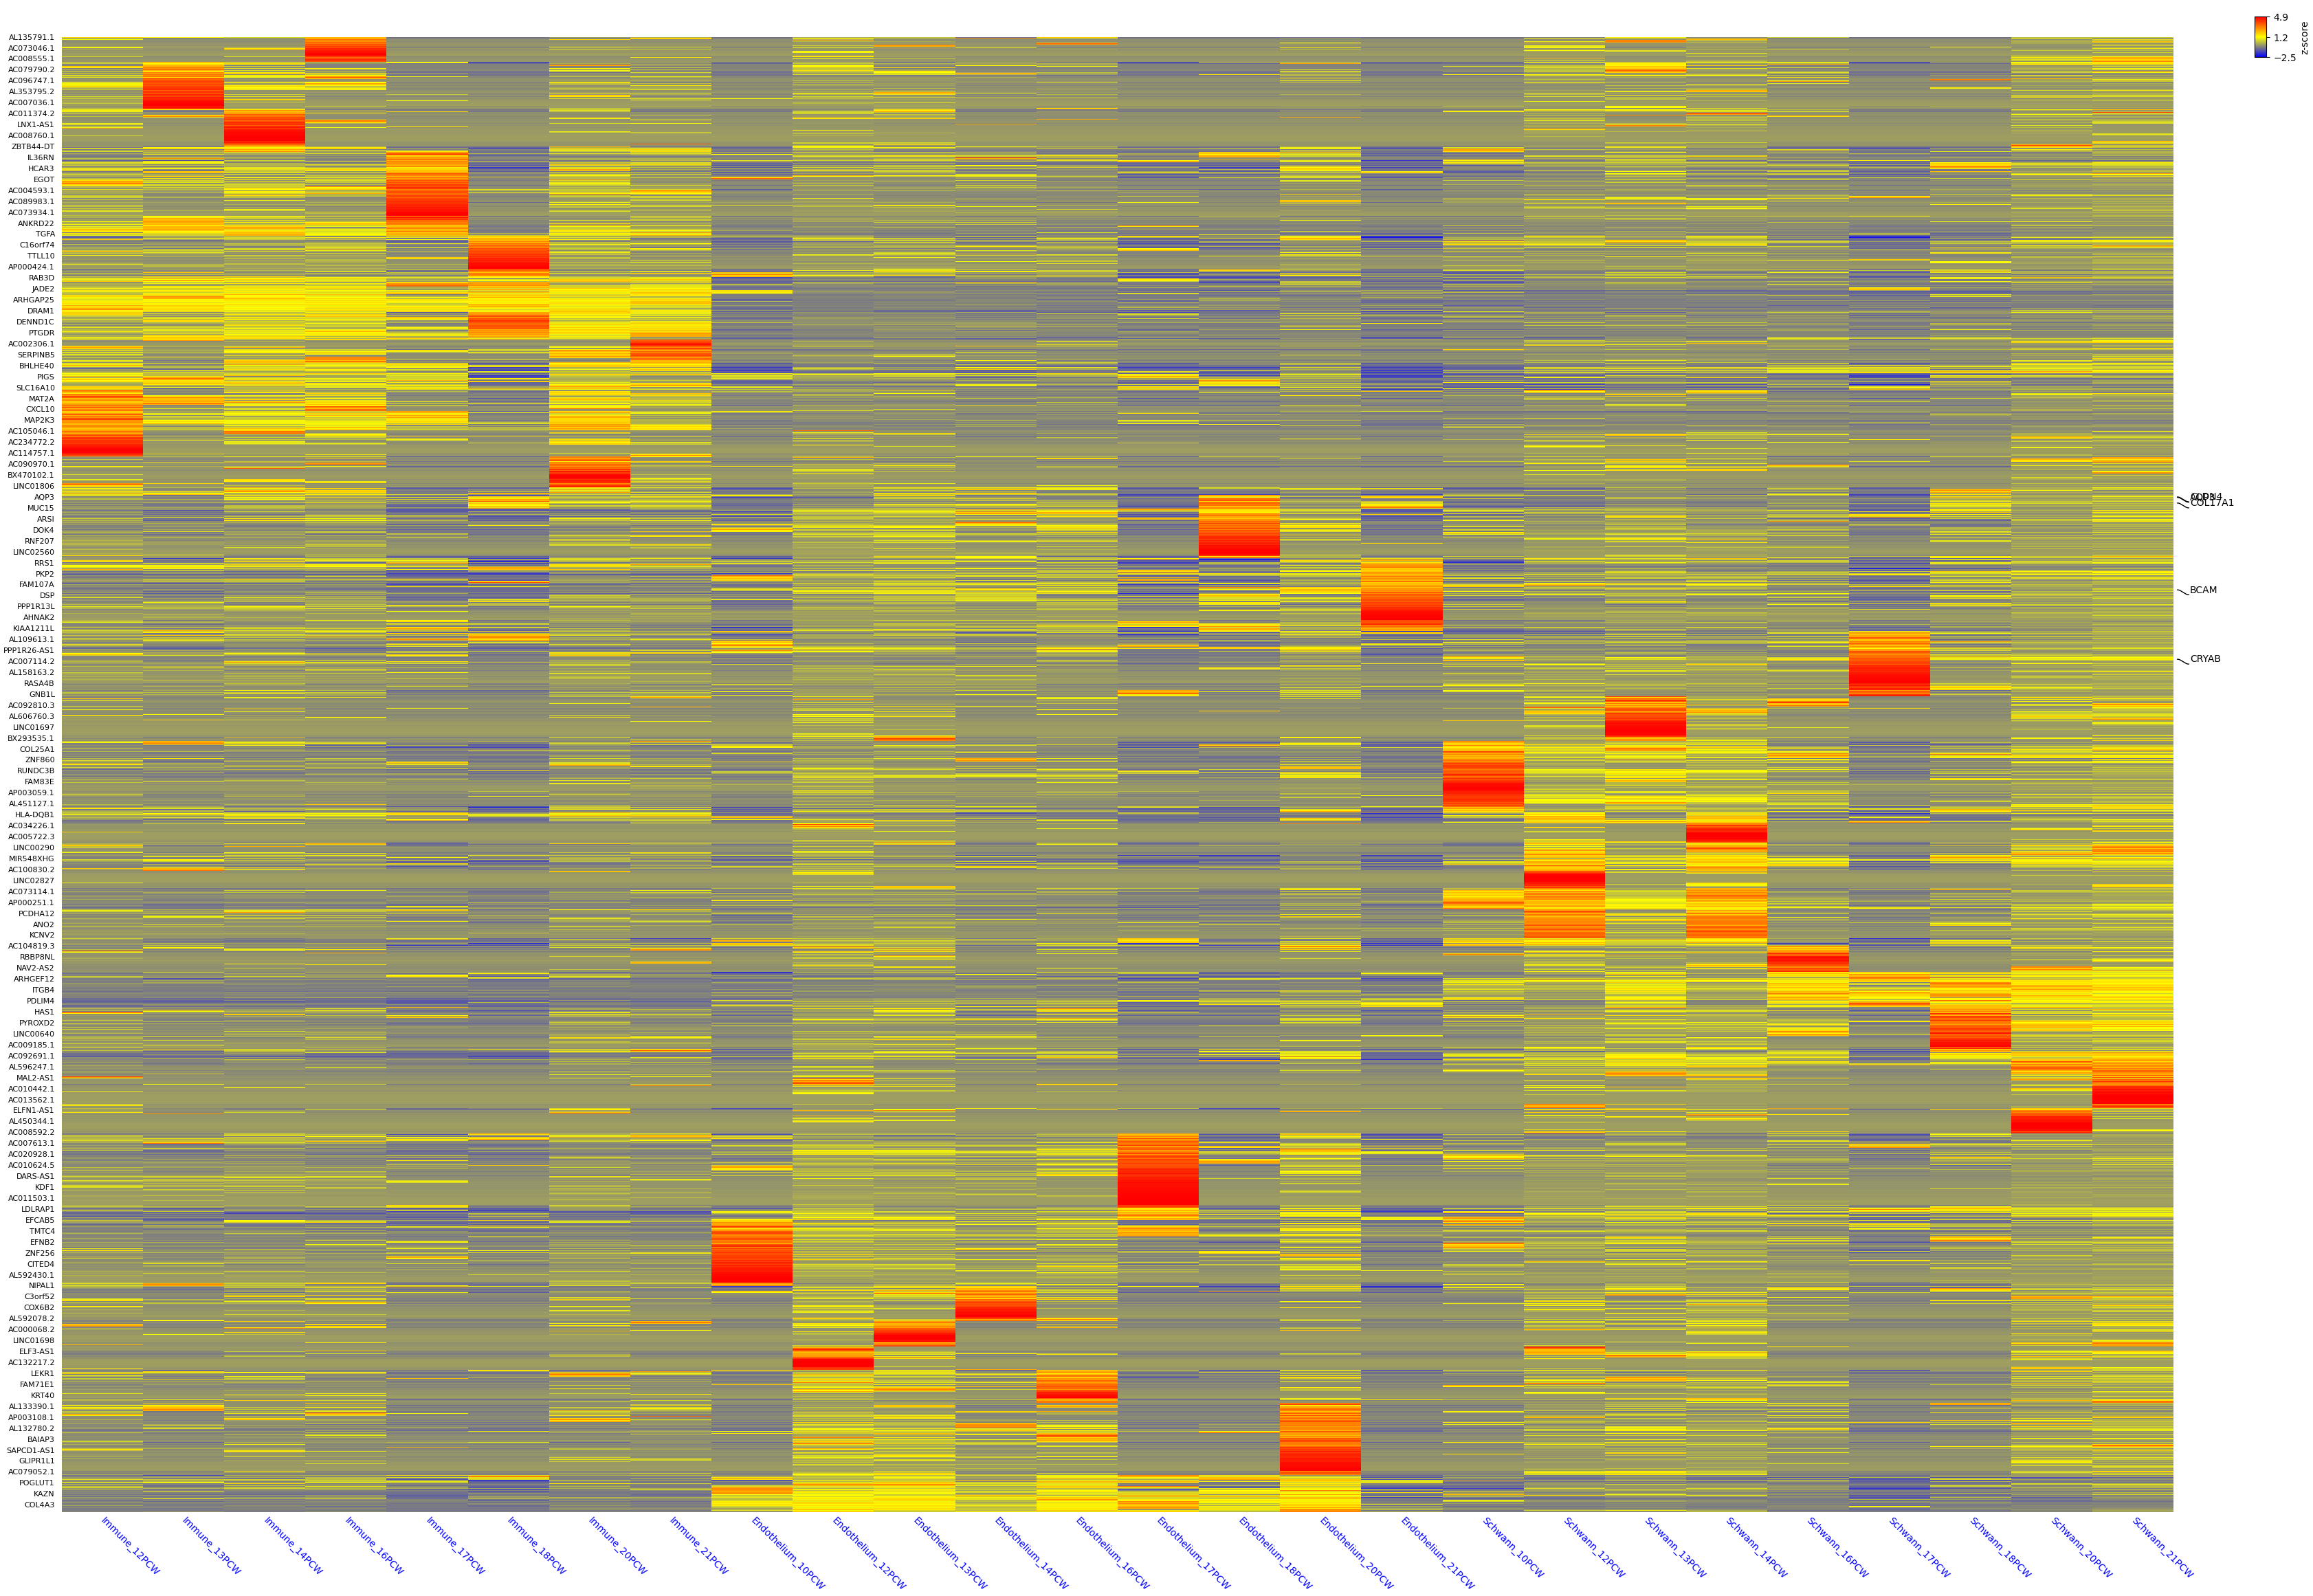

In [57]:
#Dataframe 1: Variable cell states
row_ha = HeatmapAnnotation(
                            selected = anno_label(label_rows, colors = 'black'),
                            axis = 0,verbose = 0,orientation = 'right'
                            )

plt.figure(figsize = (40, 25))
cm = ClusterMapPlotter(data = expr_1, z_score = 0,
                        right_annotation = row_ha,
                        col_cluster = False, row_cluster = True, #Play around, make col_cluster false
                        label = 'z-score',row_dendrogram = False, col_dendrogram = True,
                        show_rownames = True,show_colnames = True,
                        #plot_legend=False,
                        cmap = 'exp1', #Run with turbo
                        tree_kws = {'row_cmap': 'Dark2'},
                        xticklabels_kws = {'labelrotation':-45,'labelcolor':'blue'},
                        yticklabels_kws = {'labelsize':8}
                       )
plt.savefig("heat_map_variable_1.pdf",bbox_inches = 'tight')
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..


/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/PyComplexHeatmap/clustermap.py:636: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Starting calculating col orders..
Reordering cols..
Plotting matrix..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

Plotting legends..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

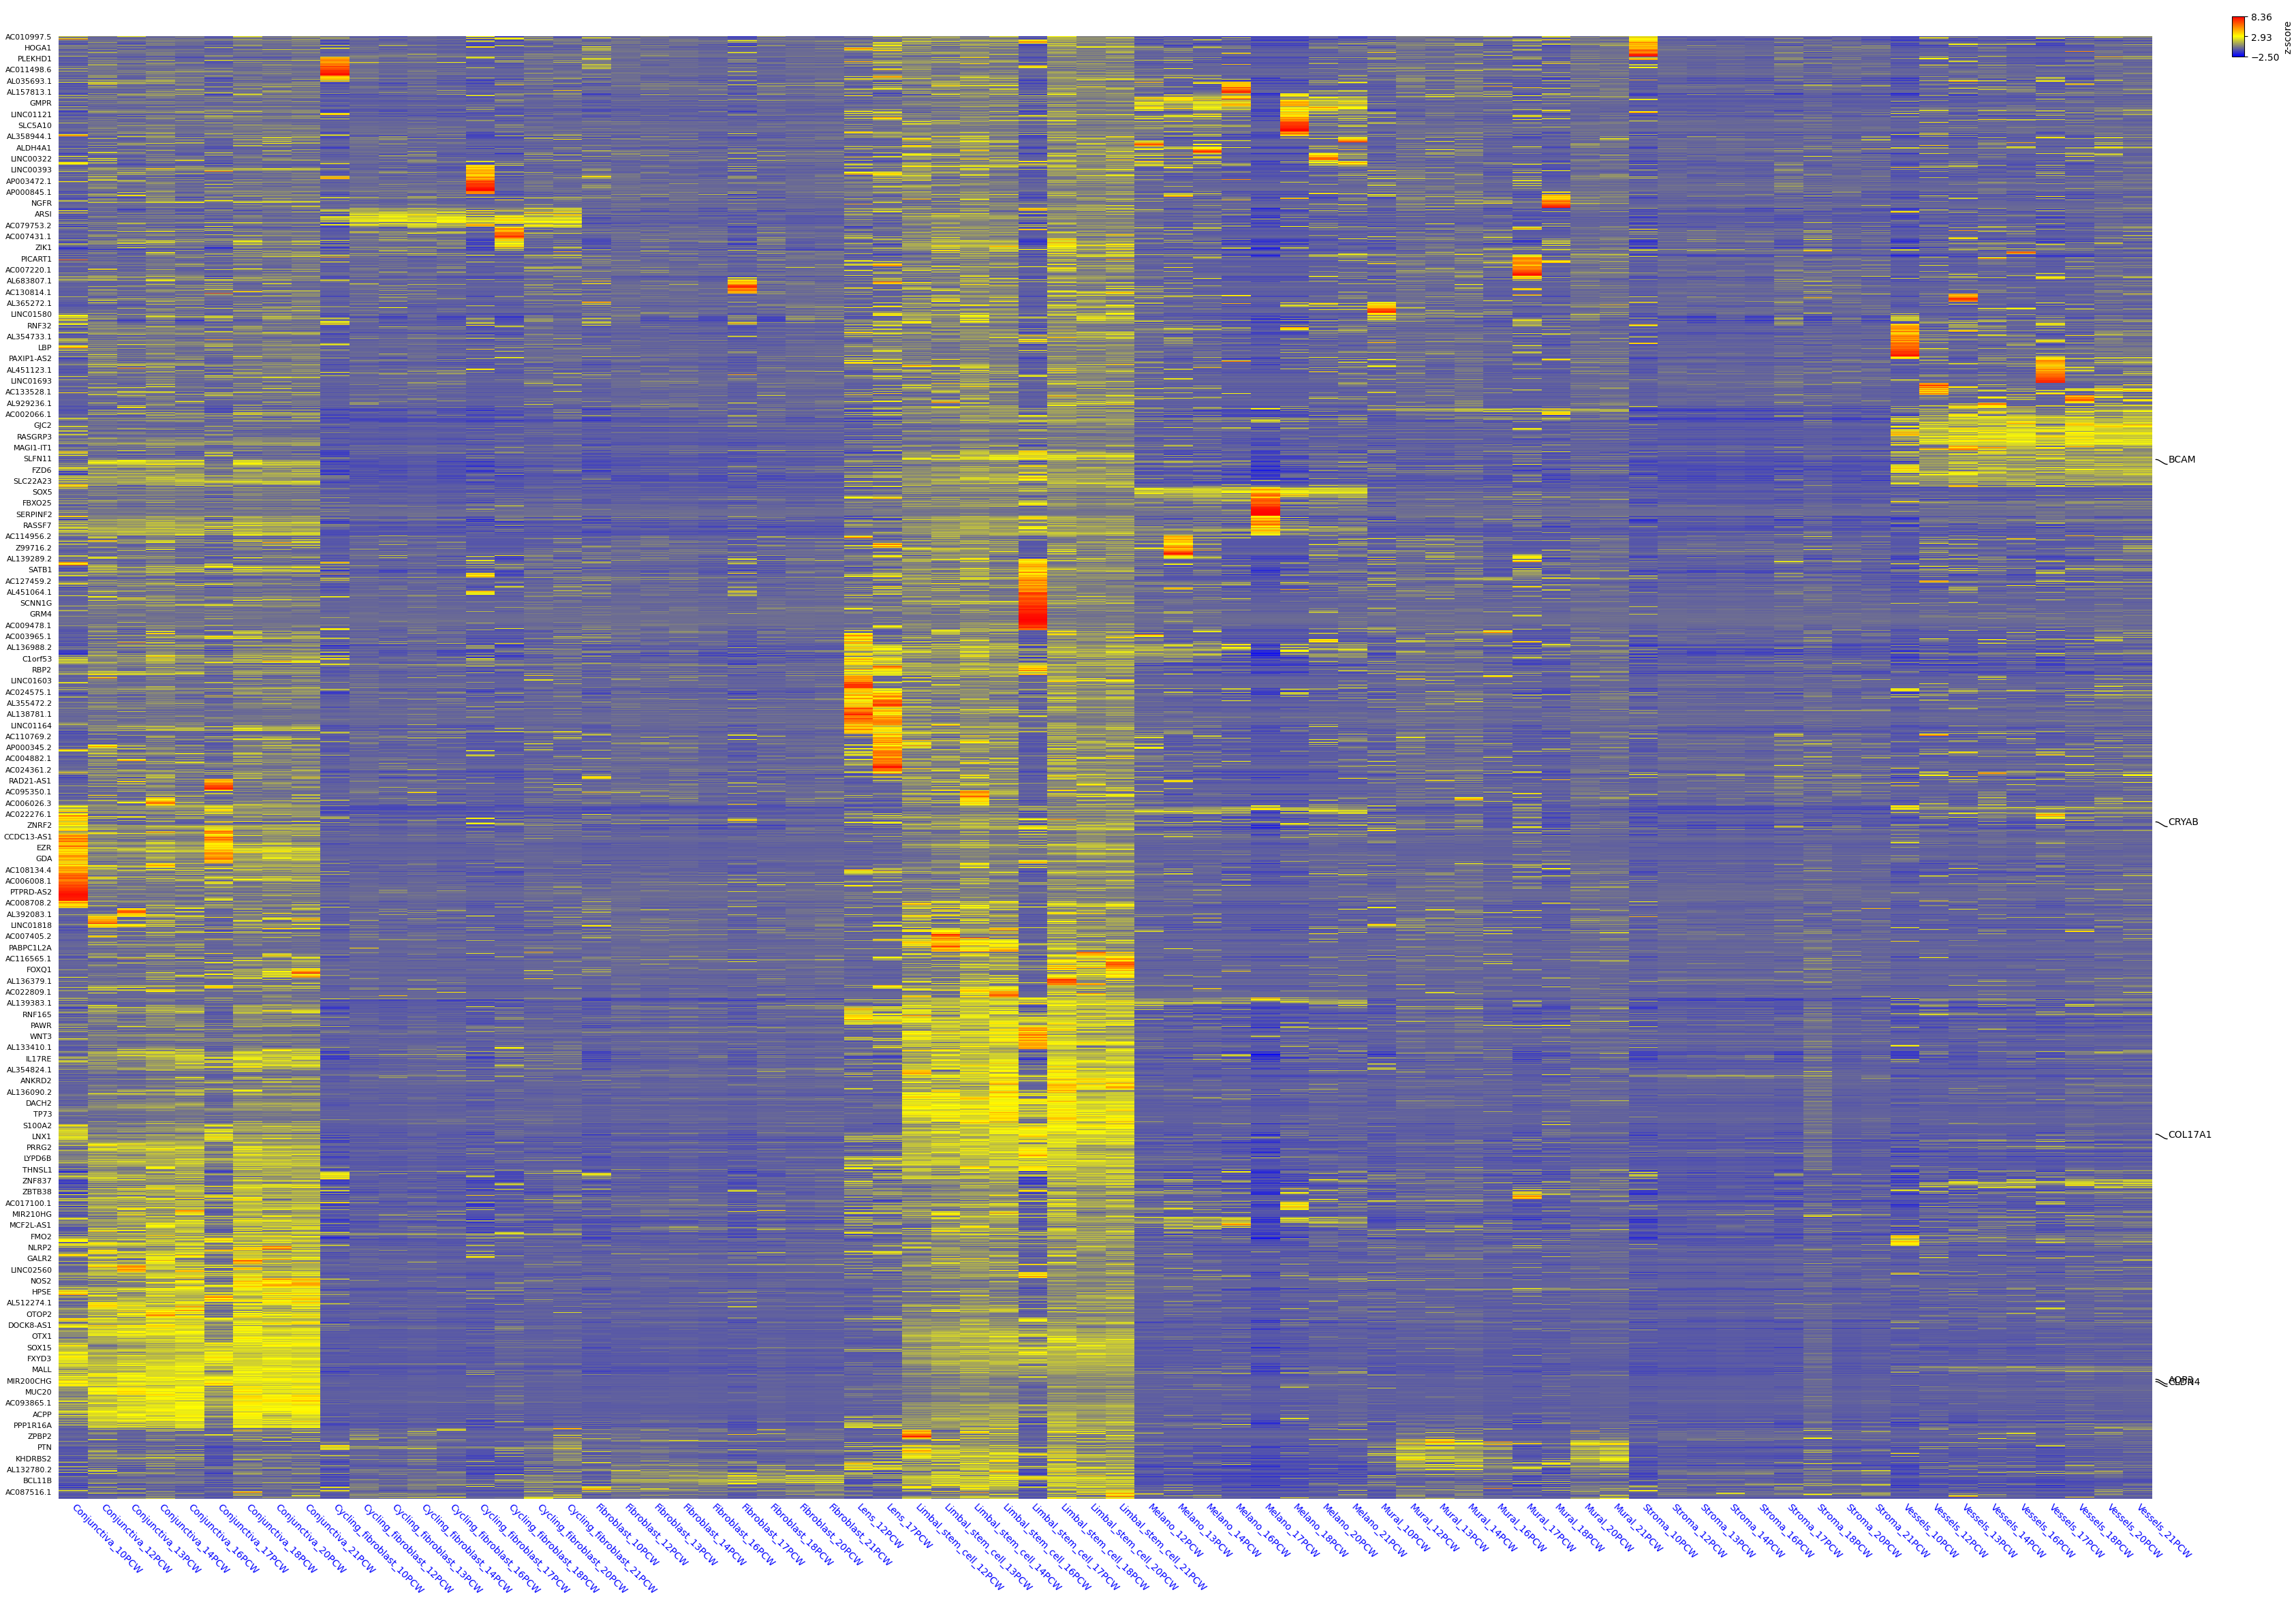

In [58]:
#Dataframe 1: Non-variable cell states
row_ha = HeatmapAnnotation(
                            selected = anno_label(label_rows, colors = 'black'),
                            axis = 0,verbose = 0,orientation = 'right'
                            )

plt.figure(figsize = (40, 25))
cm = ClusterMapPlotter(data = expr_2, z_score = 0,
                        right_annotation = row_ha,
                        col_cluster = False, row_cluster = True, #Play around, make col_cluster false
                        label = 'z-score',row_dendrogram = False, col_dendrogram = True,
                        show_rownames = True,show_colnames = True,
                        #plot_legend=False,
                        cmap = 'exp1', #Run with turbo
                        tree_kws = {'row_cmap': 'Dark2'},
                        xticklabels_kws = {'labelrotation':-45,'labelcolor':'blue'},
                        yticklabels_kws = {'labelsize':8}
                       )
plt.savefig("heat_map_nonvariable_2.pdf",bbox_inches = 'tight')
plt.show()

## Other heatmap

In [49]:
expr

,10PCW_Fibroblast,10PCW_Cycling_fibroblast,10PCW_Mural,10PCW_Stroma,10PCW_Schwann,10PCW_Conjunctiva,10PCW_Vessels,10PCW_Endothelium,12PCW_Stroma,12PCW_Fibroblast,...,21PCW_Vessels,21PCW_Limbal_stem_cell,21PCW_Fibroblast,21PCW_Mural,21PCW_Cycling_fibroblast,21PCW_Stroma,21PCW_Immune,21PCW_Schwann,21PCW_Melano,21PCW_Endothelium
genes,,,,,,,,,,,,,,,,,,,,,
MIR205HG,-0.200054,-0.200054,-0.200054,-0.200054,-0.200054,0.381876,-0.175324,-0.200054,-0.185499,-0.190379,...,-0.166689,0.327654,-0.168711,-0.162752,-0.167407,-0.154494,-0.150714,-0.167717,-0.160912,-0.200054
CXCL14,-0.151671,-0.178149,-0.072174,-0.193424,-0.199023,0.076831,-0.202389,-0.160568,-0.154401,-0.122392,...,-0.123232,0.091469,-0.085031,-0.070685,-0.110843,-0.096577,-0.086987,-0.122842,-0.115655,0.001551
KRT5,-0.201256,-0.201256,-0.199271,-0.201256,-0.192514,0.309371,-0.184512,-0.201256,-0.182352,-0.182614,...,-0.129013,0.172430,-0.132767,-0.130099,-0.139637,-0.117451,-0.106817,-0.132731,-0.119677,-0.068371
KRT17,-0.193026,-0.202021,-0.200459,-0.202021,-0.202021,-0.010436,-0.202021,-0.202021,-0.155818,-0.142141,...,-0.156670,0.097186,-0.121169,-0.152347,-0.157105,-0.149432,-0.167525,-0.153412,-0.158441,-0.052128
KRT19,-0.182382,-0.182806,-0.192695,-0.194822,-0.182906,0.025850,-0.201748,-0.188731,-0.176834,-0.165604,...,-0.145816,0.146815,-0.146793,-0.143789,-0.151745,-0.145028,-0.111481,-0.145701,-0.139213,-0.020168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL050331.2,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.128510,-0.162740,...,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740
AC104119.1,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.053439,0.290714,...,-0.176722,1.052102,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722,-0.176722
AC002401.3,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,...,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786,-0.168786


In [50]:
row_ha.orientation

'right'

In [ ]:
# shape has to be 32920, not 30+69

           Regulation
genes                
MIR205HG           Up
CXCL14             Up
KRT5               Up
KRT17              Up
KRT19              Up
...               ...
AL050331.2       Down
AC104119.1       Down
AC002401.3       Down
UMLILO           Down
AC067969.1       Down

[5337 rows x 1 columns]
genes
MIR205HG      None
CXCL14        None
KRT5          None
KRT17         None
KRT19         None
              ... 
AL050331.2    None
AC104119.1    None
AC002401.3    None
UMLILO        None
AC067969.1    None
Length: 5337, dtype: object
(5337, 98)
Starting plotting..
Starting calculating row orders..
Reordering rows..


/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/PyComplexHeatmap/clustermap.py:636: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/vol/mbconda/imarais/miniconda3/envs/pycomplex/lib/python3.10/site-packages/PyComplexHeatmap/clustermap.py:636: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Starting calculating col orders..
Reordering cols..
Plotting matrix..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial


Plotting legends..


findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans serif' not found because

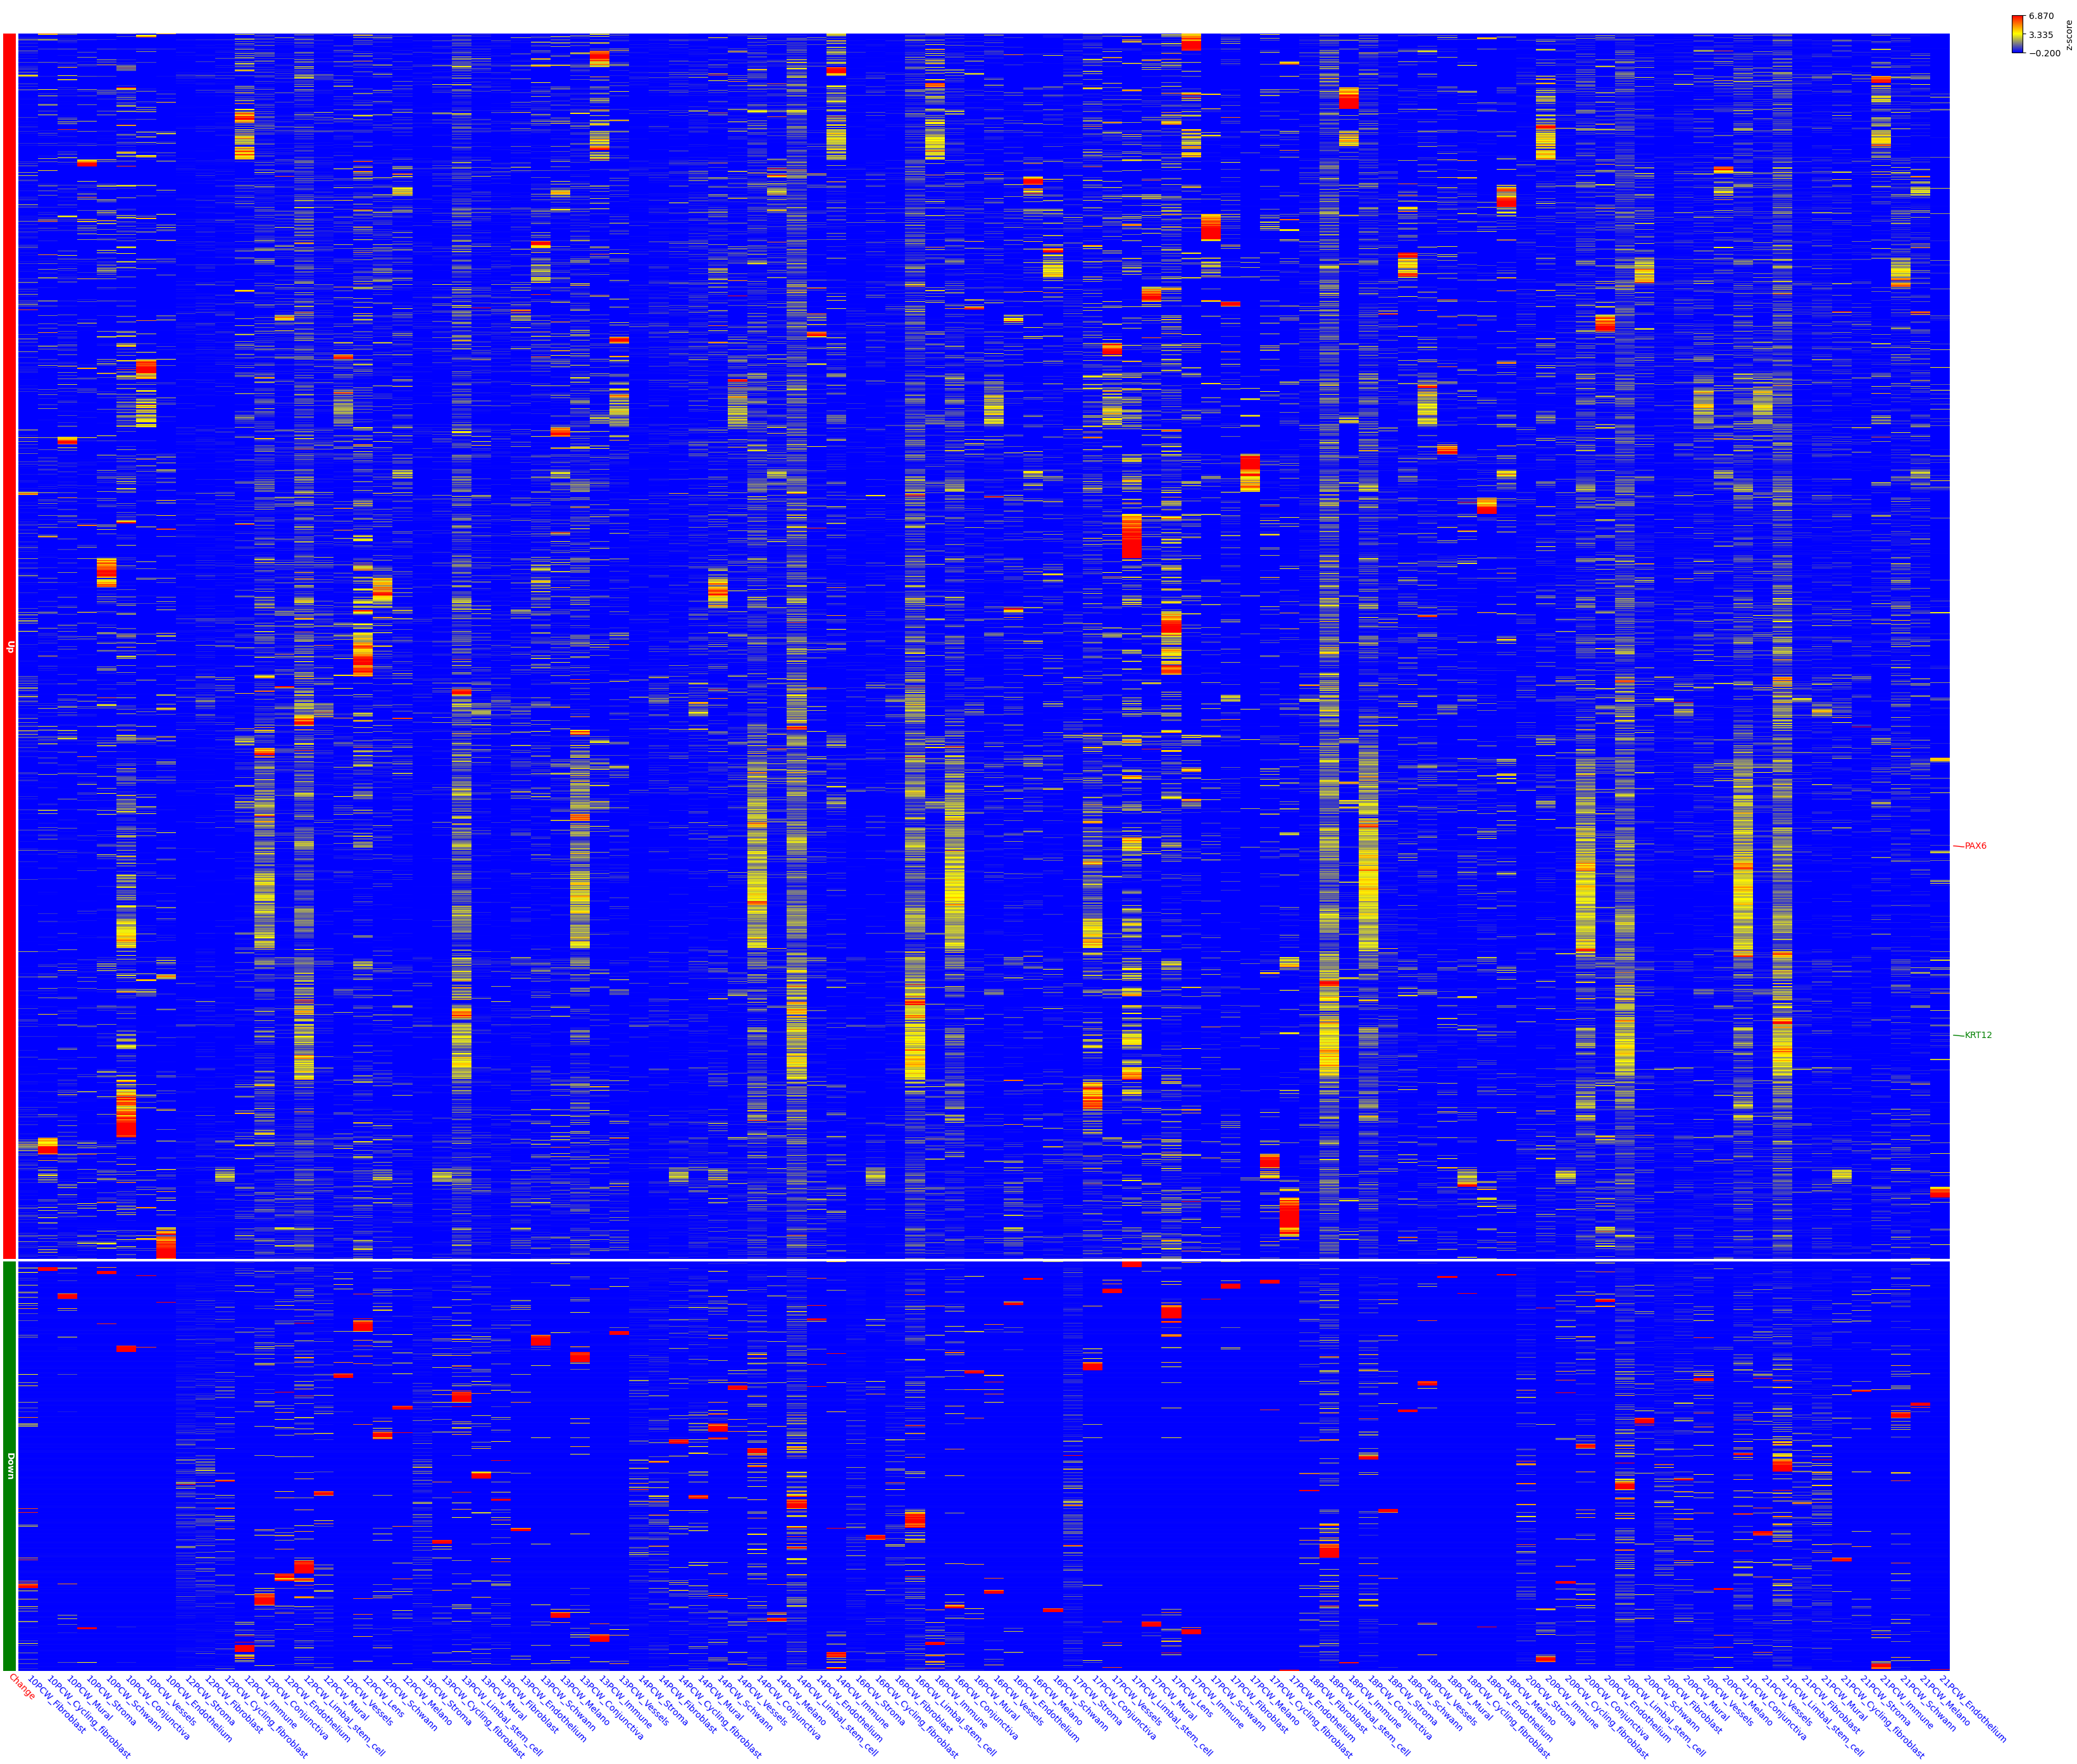

In [52]:
rank2 = pd.DataFrame(index = expr.index, data = ['Up']*4000 + ['Down']*1337, columns = ['Regulation']) #I change 20 to 30 because otherwise indices issue (there are supposedly 99 indices but if it was 20 then it only made 89 indices)
print(rank2)

goi = ['LUM', 'PAX6', 'PMEL',  'TOP2A', 'CRYGS',  'KRT12', 'ENG', 'ALCAM']
colors_dict = {}
for g in goi:
    if g == 'PAX6':
        colors_dict[g] = 'red'
    else:
        colors_dict[g] = 'green'

label_rows = expr.apply(lambda x:x.name if x.name in goi else None,axis = 1)
print(label_rows)
print(expr.shape)


row_ha_left = HeatmapAnnotation(
                            Change = anno_simple(rank2['Regulation'],colors = {'Up': 'red', 'Down': 'green'},
                                                add_text = True,legend = False,height = 5,
                                                text_kws = {'color':'white', 'fontsize':10,'fontweight':'bold',
                                                          'rotation':-90,'horizontalalignment':'left'}),
                            label_kws = {'fontsize':10,'color':'red','rotation':-45,'horizontalalignment':'left'},
                            label_side = 'bottom',axis = 0,verbose = 0
                            )

row_ha_right = HeatmapAnnotation(
                            selected = anno_label(label_rows, colors = colors_dict,
                                               relpos = (0,0.4)),  #label_side='top',
                            axis = 0,verbose = 0,
                            #label_kws={'rotation':0,'horizontalalignment':'right','verticalalignment':'top', },
                            orientation = 'right'
                            )
#plt.show()

plt.figure(figsize = (40, 30))
cm = ClusterMapPlotter(data = expr,  z_score = 0,
                        right_annotation = row_ha_right, left_annotation = row_ha_left,#
                        col_cluster = False,row_cluster = True, #Could make col_clust = false
                        label = 'z-score',row_dendrogram = False,
                        col_dendrogram = True, show_rownames = True,show_colnames = True,
                        cmap = 'exp1',
                        row_split = rank2['Regulation'],row_split_gap = 0.8,
                        col_split = 2,col_split_gap = 0.8,
                        tree_kws = {'col_cmap': 'Set1'}, xticklabels_kws = {'labelrotation':-45,'labelcolor':'blue'}
                       )
# you can add row_split if you want: uncomment it.


# print(cm.row_order)
# print(cm.col_order)
plt.savefig("heatmap_rank_genes_colclusfalse.pdf",bbox_inches = 'tight')
plt.show()

In [ ]:
#Again there are no gene names, only numbers... and there is a lot of blue (Double check with sum = 0 instead)